In [152]:
%run kafka.ipynb
group = 'g-test-1'
topic = 'test'
topic = 'llama2-7b-01'
#topic = 'llama2-13b-01'

In [153]:
send_to_topic({'action':'stop'},topic)

In [155]:
get_last_n_messages(2,topic='jobs',group_id='test-consumer')

none


[{'id': '202308-0113-3321-a2ff3813-c713-4044-816a-b7870dc5cae9',
  'name': 'llama-2-13b-chat',
  'status': 'end',
  'type': 'backend',
  'topic': 'llama2-13b-01',
  'date': '2023-08-08 11:48:32'},
 {'id': '202308-0108-3236-afbc19e7-0eed-48b0-b184-438383102e4e',
  'name': 'llama-2-7b-chat',
  'status': 'end',
  'type': 'backend',
  'topic': 'llama2-7b-01',
  'date': '2023-08-08 11:49:36'}]

In [150]:
#topic = 'llama2-7b-01'
topic = 'llama2-13b-01'
get_last_n_messages(2,topic=topic,group_id='test-consumer')

none


[{'answer': " Certainly, I'd be happy to help! iPaaS stands for Integration Platform as a Service. It's a cloud-based platform that enables organizations to integrate their applications, data, and systems with each other and with external systems, such as APIs, cloud services, and on-premises systems.\n\nWith iPaaS, organizations can connect their applications and systems in a flexible, scalable, and secure manner, without the need for complex and expensive hardware or software installations. This allows them to streamline their business processes, improve their bottom line, and gain a competitive edge in their industry.\n\nNow, can you tell me more about your experience with SEEBURGER's iPaaS solution? What specific features or benefits have you found most valuable in your work with the platform?",
  'id': '202308-0811-2550-9c50082e-f4ee-45eb-a8f1-36a48b2bddf1',
  'time': 16},
 {'action': 'stop'}]

In [77]:
input = get_last_n_messages(2,topic=topic,group_id='test-consumer')[0]['instruction']
ast.literal_eval(input)

none


KeyError: 'instruction'

In [85]:
import ast
_str = get_last_n_messages(1,topic=topic,group_id='test-consumer')[0]['instruction']
generate(*ast.literal_eval(_str))

none
{'message': <class 'str'>, 'history_with_input': <class 'list'>, 'system_prompt': <class 'str'>, 'max_new_tokens': <class 'int'>, 'temperature': <class 'int'>, 'top_p': <class 'float'>, 'top_k': <class 'int'>, '_dict': <class 'dict'>}


In [86]:
from typing import get_type_hints

def generate(
    message: str,
    history_with_input: list[tuple[str, str]],
    system_prompt: str,
    max_new_tokens: int,
    temperature: float,
    top_p: float,
    top_k: int,
):
    #_dict = { key:item for key,item in locals().items()}
    _dict = { key:type(item) for key,item in locals().items()}
    print(_dict)
    
type_hints = get_type_hints(generate)

# Print the defined types
for parameter, parameter_type in type_hints.items():
    print(f"{parameter}: {parameter_type}")    

message: <class 'str'>
history_with_input: list[tuple[str, str]]
system_prompt: <class 'str'>
max_new_tokens: <class 'int'>
temperature: <class 'float'>
top_p: <class 'float'>
top_k: <class 'int'>


In [91]:
ast.literal_eval(_str)[1]

[]

# send question

In [7]:
import ast
input= ['What is iPaaS (Integration Platform as a Service)', [], "You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.\n\nIf a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.", 1024, 1, 0.95, 50]
_str = str(input)
ast.literal_eval(_str)

question = create_question_message(question=_str)
send_to_topic(question,topic)
id = question['id']
question

{'id': '202307-2808-5047-291e768b-321b-4b49-b89e-ee3a2d6ac081',
 'instruction': '[\'What is iPaaS (Integration Platform as a Service)\', [], "You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.\\n\\nIf a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don\'t know the answer to a question, please don\'t share false information.", 1024, 1, 0.95, 50]'}

In [6]:
question

{'id': '202307-2808-4906-581b62b6-0d21-4546-9376-ada906f6d70e',
 'instruction': '[\'What is iPaaS (Integration Platform as a Service)\', [], "You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.\\n\\nIf a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don\'t know the answer to a question, please don\'t share false information.", 1024, 1, 0.95, 50]'}

In [26]:
send_to_topic({'actionb':'stop'},'test-topic')

In [28]:
messages = get_last_n_messages(1,topic='test-topic',group_id='my-consumer-qra')    
message = messages[0]
messages

none


[{'actionb': 'stop'}]

In [9]:
messages = get_last_n_messages(2,topic='jobs',group_id='my-consumer-qra')    
message = messages[0]
messages

none


[{'id': '202307-1115-5607-91ce7ece-a1e2-4b95-a051-015654c7a6ac',
  'name': 'qr',
  'status': 'start',
  'type': 'backend',
  'date': '2023-07-11 15:56:07'},
 {'id': '202307-1115-5607-91ce7ece-a1e2-4b95-a051-015654c7a6ac',
  'name': 'qr',
  'status': 'end',
  'type': 'backend',
  'date': '2023-07-12 09:26:16'}]

In [5]:
msg = create_status_message(type='backend',status='start',name='qr')
msg

{'id': '202307-1115-4839-29fc7946-9351-4aab-87d6-351a65645dc7',
 'name': 'qr',
 'status': 'start',
 'type': 'backend',
 'date': '2023-07-11 15:52:05'}

In [7]:
#topic = 'qr-01'
send_to_topic({'action':'stop'},'qr-01')

In [10]:
group = 'g-test-1'
topic = 'llama2-7b-01'

In [30]:
messages = get_last_n_messages(2,topic=topic,group_id=group)    
messages[0]['id'],messages[1]['id']

none


('202307-2814-0103-e09a74c1-c68d-498c-8640-9dce529ced01',
 '202307-2814-0103-e09a74c1-c68d-498c-8640-9dce529ced01')

In [31]:
messages = get_last_n_messages(1,topic=topic,group_id=group)    
message = messages[0]
message

none


{'answer': '(\'\', [(\'What is iPaaS (Integration Platform as a Service)\', " Hello! I\'m here to help you with your question. iPaaS (Integration Platform as a Service) is a cloud-based platform that enables organizations to integrate their applications, data, and services with ease. It provides a centralized and standardized integration environment that enables organizations to connect their applications, APIs, and data sources, and automate the flow of data and processes across these systems.\\niPaaS platforms offer a variety of benefits, including:\\n1. Easy integration: iPaaS platforms provide a simple and intuitive interface for integrating applications, data, and services, without the need for complex coding or programming.\\n2. Scalability: iPaaS platforms are designed to handle large volumes of data and traffic, making them scalable to meet the needs of growing organizations.\\n3. Flexibility: iPaaS platforms offer a wide range of integration options, including real-time, batch

In [33]:
ast.literal_eval(message['answer'])

('',
 [('What is iPaaS (Integration Platform as a Service)',
   " Hello! I'm here to help you with your question. iPaaS (Integration Platform as a Service) is a cloud-based platform that enables organizations to integrate their applications, data, and services with ease. It provides a centralized and standardized integration environment that enables organizations to connect their applications, APIs, and data sources, and automate the flow of data and processes across these systems.\niPaaS platforms offer a variety of benefits, including:\n1. Easy integration: iPaaS platforms provide a simple and intuitive interface for integrating applications, data, and services, without the need for complex coding or programming.\n2. Scalability: iPaaS platforms are designed to handle large volumes of data and traffic, making them scalable to meet the needs of growing organizations.\n3. Flexibility: iPaaS platforms offer a wide range of integration options, including real-time, batch, and file-based 

In [24]:
dict_str = message['instruction']
value = ast.literal_eval(dict_str)
value

['Explain the plot of Cinderella in a sentence.',
 [['Hello there! How are you doing?', '']],
 "You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.\n\nIf a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.",
 1024,
 1,
 0.95,
 50]

In [14]:
'action' in message.keys()

True

In [ ]:
img_str = base64_encode_pil_image(image)
answer = create_answer_message (answer=img_str,id=id,time=1.0)
send_to_topic(answer,topic)

In [ ]:
messages[0]

In [ ]:
%run kafka.ipynb
group = 'g-test-1'
topic = 'qr-01'
messages = get_last_n_messages(1,topic=topic,group_id='my-consumer-qr')    
message = messages[0]
message

# decode answer

In [ ]:
messages = get_last_n_messages(1,topic=topic,group_id='my-consumer-qr')    
message = messages[0]
message.keys()

In [ ]:
messages = get_last_n_messages(1,topic=topic,group_id='my-consumer-qr')    
message = messages[0]
if 'answer' in message.keys():
    image = base64_decode_pil_image(message['answer'])
    display(image)

In [ ]:
#messages[0]
#len(messages)

# init

In [2]:
%run kafka.ipynb
group = 'g-qr-2'
topic = 'qr-01'

# wait for answer

In [4]:
id = '202307-0708-3319-7be170ce-dd07-4143-9472-a7acf7e3ed63'    
consumer = create_and_subscribe_consumer(group = group,topic = topic)   

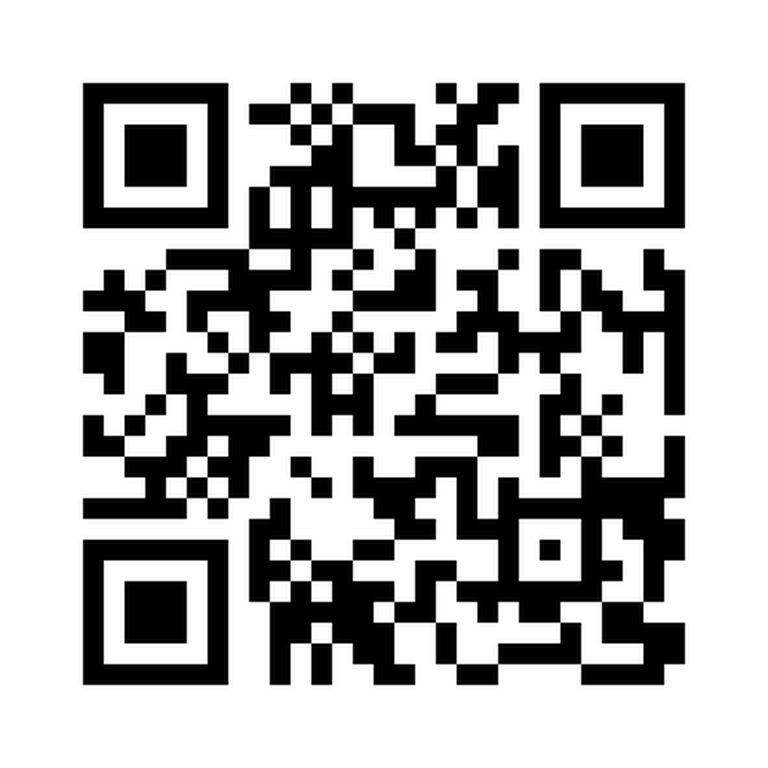

In [7]:

            
get_response_image(consumer,topic=topic,key='answer',id=id)

In [ ]:
_id = msg['id']

def get_response(consumer,topic=None,id=None,key='answer'):
    while True:
        message = consumer.poll(120.0)
        if not message or  message.error():
            continue
                
        dict_str = message.value().decode('utf-8')
        value = ast.literal_eval(dict_str)
        if (value['id'] == _id):
            #messages.append(message)
            if key in value.keys():
                dt2 = datetime.now()
                time = (dt2 - dt1).seconds
                msg = {'id':_id, 'time':time}
                byte_str = dict_to_byte_str(msg)   
                send_to_topic(byte_str,'test-topic')
    
                return(value['answer'])